In [ ]:
from sage.all import sigma, nth_prime
import pickle
import ast

prime_lst =[] # corrected prime list
for k in range(1, 501):
    prime_lst.append([k,nth_prime(k)])
    print(k)

with open('/Users/barrybrent/data/run10sept25no20.txt', 'wb') as wfile:
    pickle.dump(prime_lst, wfile) #output snipped

In [ ]:
ls=[2,3,5]
ls[1:]

In [24]:
import pickle
with open('/Users/barrybrent/data/run10sept25no20.txt', 'rb') as rfile:
    prime_list = pickle.load(rfile)
print(prime_list[:10])
print("length:",len(prime_list))

[[1, 2], [2, 3], [3, 5], [4, 7], [5, 11], [6, 13], [7, 17], [8, 19], [9, 23], [10, 29]]
length: 500


In [9]:
import pickle
with open('/Users/barrybrent/data/run10sept25no20.txt', 'rb') as rfile:
    prime_list = pickle.load(rfile)
h_list=[[0,1]]+prime_list # h_0 = 1 required by the lemmas
print(h_list[:3])

[[0, 1], [1, 2], [2, 3]]


In [ ]:
import pickle
with open('/Users/barrybrent/data/run10sept25no20.txt', 'rb') as rfile:
    prime_list = pickle.load(rfile)
h_list=[[0,1]]+prime_list # h_0 = 1 required by the lemmas
j_list=[(0,0)] # first entry is just an offset. 
for n in [1..500]:# so j(1) = 1 = h(0) as required.
    print(n)
    sm=0
    for r in [0..n-1]:
        sm=sm+j_list[r][1]*h_list[n-r][1]
    j_n=n*h_list[n][1]-sm
    j_list.append((n,j_n))
    
print("j length:",len(j_list))   
print(j_list[:5])
with open('/Users/barrybrent/data/run30sept25no1.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) # ouput snipped

In [87]:
import pickle
with open('/Users/barrybrent/data/run30sept25no1.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
print(j_list[:5])
print(len(j_list))

[(0, 0), (1, 2), (2, 2), (3, 5), (4, 2)]
501


[ 2 -1]
[ 2  2]

(2, 1)


[ 2 -1  0]
[ 2  2 -2]
[ 5  2  2]

(3, 1)


[ 2 -1  0  0]
[ 2  2 -2  0]
[ 5  2  2 -3]
[ 2  5  2  2]

(4, 1)


[ 2 -1  0  0  0]
[ 2  2 -2  0  0]
[ 5  2  2 -3  0]
[ 2  5  2  2 -4]
[12  2  5  2  2]

(5, 1)


[  2  -1   0   0   0   0]
[  2   2  -2   0   0   0]
[  5   2   2  -3   0   0]
[  2   5   2   2  -4   0]
[ 12   2   5   2   2  -5]
[-13  12   2   5   2   2]

(6, 1)


[  2  -1   0   0   0   0   0]
[  2   2  -2   0   0   0   0]
[  5   2   2  -3   0   0   0]
[  2   5   2   2  -4   0   0]
[ 12   2   5   2   2  -5   0]
[-13  12   2   5   2   2  -6]
[ 16 -13  12   2   5   2   2]

(7, 1)
tests:
[1, 1, 1, 1, 1, 1]
MINIMUM MODULI


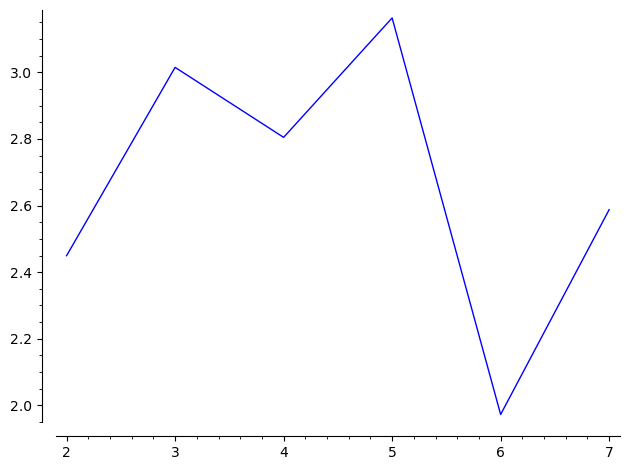

LOGS MINIMUM MODULI


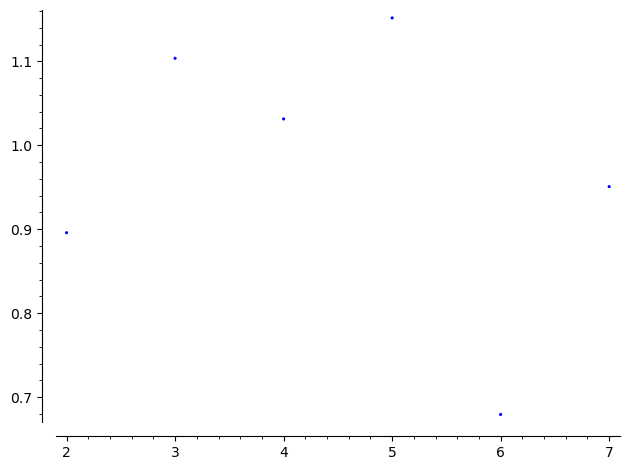

MAXIMUM MODULI


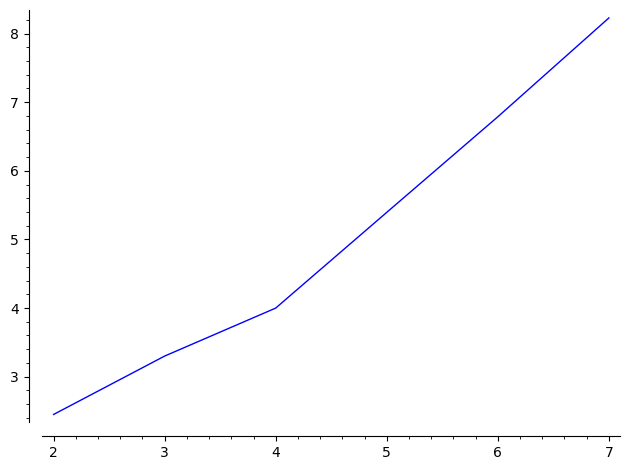

LOGS MAXIMUM MODULI


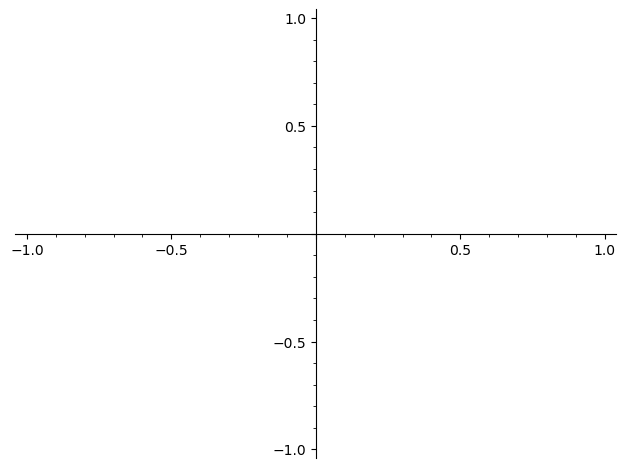

In [90]:
# try to correct the offset
def P_matrix(lst):
    lenlist = len(lst)
    columns = [lst]
    for k in range(1, lenlist):
        column = [0]*(k-1) + [-k] + lst
        column = column[:lenlist]
        columns.append(column)
    return matrix(columns).transpose()

import pickle
with open('/Users/barrybrent/data/run30sept25no1.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)


from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
maxes_list=[]
log_mins_list=[]
log_maxes_list=[]
no=[]
tests=[]
for bound in range(2,8):
    lst = [j[1] for j in j_list[1:bound+1]] # cuts out the dummy offset
    inpt=[j for j in lst]
    pl=P_matrix(inpt)
    test=pl.det()/(nth_prime(bound)*factorial(bound))
    tests.append(test)
    show(pl)
    print((bound,test))
    matrix_list+=[(bound,pl)]
    cp=pl.charpoly()
    charpol_list+=[(bound,cp)]
    roots = cp.roots(ring=CIF, multiplicities=False)        # produces list of roots as Sage objects
    roots_list+=[(bound,roots)]
    centers=[r.center() for r in roots]
    pairs = [(z.real(), z.imag()) for z in centers]

# Plot the points (no lines, small points, only axis ticks)
    p = list_plot(pairs, plotjoined=False, pointsize=10, axes_labels=['', ''])
    #p.show()
    centers_list+=[(bound,centers)]
    max_diameter=max([r.diameter() for r in roots])
    max_diameter_list+=[(bound,max_diameter)]
    aar = [r.abs() for r in roots]
    aar_list+=[(bound,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)
        mins_list.append((bound,minn))
        log_minn=log(minn)
        log_mins_list.append((bound,log_minn))
        maxx=max(aar)
        maxes_list.append((bound,maxx))
    
print("tests:")
print(tests)
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=False, pointsize=5, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
print("MAXIMUM MODULI")
p.show()
p = list_plot(log_maxes_list, plotjoined=False, pointsize=5, axes_labels=['', ''])
print("LOGS MAXIMUM MODULI")
p.show()

(2, 1)
(3, 1)
(4, 1)
(5, 1)
(6, 1)
(7, 1)
(8, 1)
(9, 1)
(10, 1)
(11, 1)
(12, 1)
(13, 1)
(14, 1)
(15, 1)
(16, 1)
(17, 1)
(18, 1)
(19, 1)
(20, 1)
(21, 1)
(22, 1)
(23, 1)
(24, 1)
(25, 1)
(26, 1)
(27, 1)
(28, 1)
(29, 1)
(30, 1)
(31, 1)
(32, 1)
(33, 1)
(34, 1)
(35, 1)
(36, 1)
(37, 1)
(38, 1)
(39, 1)
(40, 1)
(41, 1)
(42, 1)
(43, 1)
(44, 1)
(45, 1)
(46, 1)
(47, 1)
(48, 1)
(49, 1)
(50, 1)


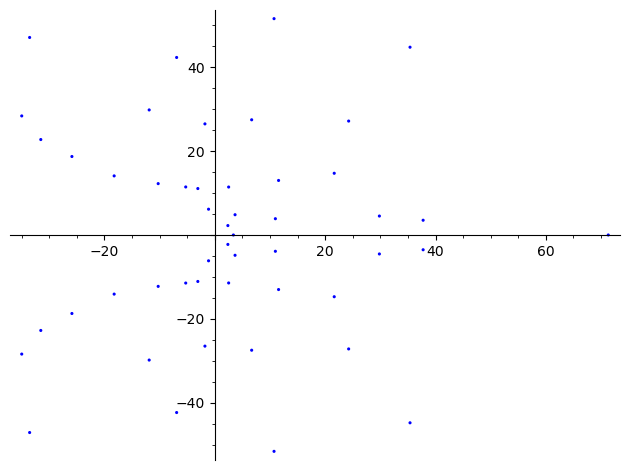

ROOTS AT N =  50
(51, 1)
(52, 1)
(53, 1)
(54, 1)
(55, 1)
(56, 1)
(57, 1)
(58, 1)
(59, 1)
(60, 1)
(61, 1)
(62, 1)
(63, 1)
(64, 1)
(65, 1)
(66, 1)
(67, 1)
(68, 1)
(69, 1)
(70, 1)
(71, 1)
(72, 1)
(73, 1)
(74, 1)
(75, 1)
(76, 1)
(77, 1)
(78, 1)
(79, 1)
(80, 1)
(81, 1)
(82, 1)
(83, 1)
(84, 1)
(85, 1)
(86, 1)
(87, 1)
(88, 1)
(89, 1)
(90, 1)
(91, 1)
(92, 1)
(93, 1)
(94, 1)
(95, 1)
(96, 1)
(97, 1)
(98, 1)
(99, 1)
(100, 1)


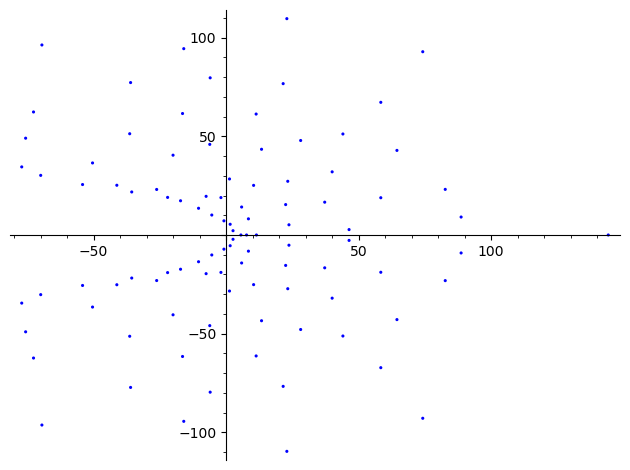

ROOTS AT N =  100
(101, 1)
(102, 1)
(103, 1)
(104, 1)
(105, 1)
(106, 1)
(107, 1)
(108, 1)
(109, 1)
(110, 1)
(111, 1)
(112, 1)
(113, 1)
(114, 1)
(115, 1)
(116, 1)
(117, 1)
(118, 1)
(119, 1)
(120, 1)
(121, 1)
(122, 1)
(123, 1)
(124, 1)
(125, 1)
(126, 1)
(127, 1)
(128, 1)
(129, 1)
(130, 1)
(131, 1)
(132, 1)
(133, 1)
(134, 1)
(135, 1)
(136, 1)
(137, 1)
(138, 1)
(139, 1)
(140, 1)
(141, 1)
(142, 1)
(143, 1)
(144, 1)
(145, 1)
(146, 1)
(147, 1)
(148, 1)
(149, 1)
(150, 1)


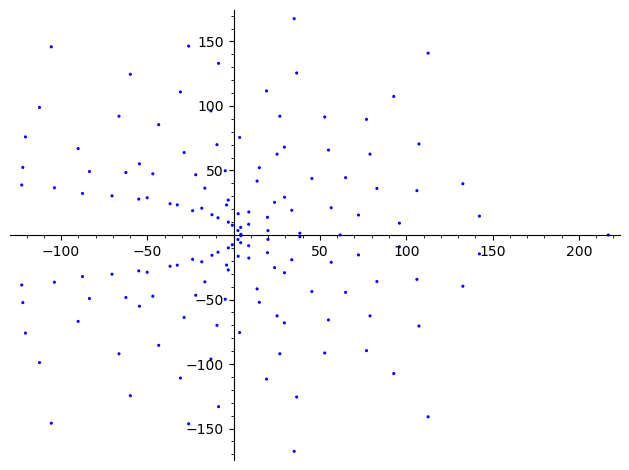

ROOTS AT N =  150
(151, 1)
(152, 1)
(153, 1)
(154, 1)
(155, 1)
(156, 1)
(157, 1)
(158, 1)
(159, 1)
(160, 1)
(161, 1)
(162, 1)
(163, 1)
(164, 1)
(165, 1)
(166, 1)
(167, 1)
(168, 1)
(169, 1)
(170, 1)
(171, 1)
(172, 1)
(173, 1)
(174, 1)
(175, 1)
(176, 1)
(177, 1)
(178, 1)
(179, 1)
(180, 1)
(181, 1)
(182, 1)
(183, 1)
(184, 1)
(185, 1)
(186, 1)
(187, 1)
(188, 1)
(189, 1)
(190, 1)
(191, 1)
(192, 1)
(193, 1)
(194, 1)
(195, 1)
(196, 1)
(197, 1)
(198, 1)
(199, 1)
(200, 1)


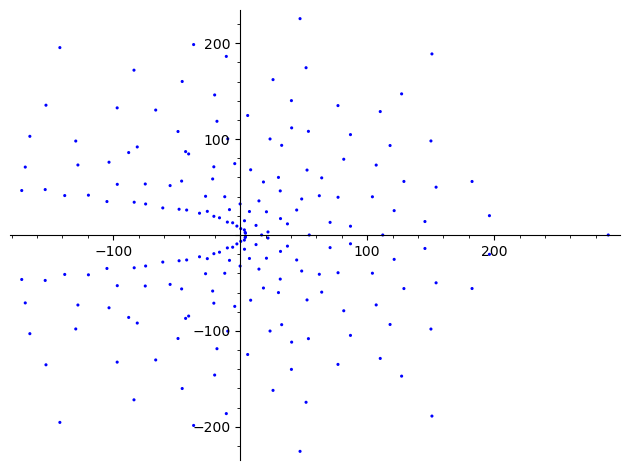

ROOTS AT N =  200
(201, 1)
(202, 1)
(203, 1)
(204, 1)
(205, 1)
(206, 1)
(207, 1)
(208, 1)
(209, 1)
(210, 1)
(211, 1)
(212, 1)
(213, 1)
(214, 1)
(215, 1)
(216, 1)
(217, 1)
(218, 1)
(219, 1)
(220, 1)
(221, 1)
(222, 1)
(223, 1)
(224, 1)
(225, 1)
(226, 1)
(227, 1)
(228, 1)
(229, 1)
(230, 1)
(231, 1)
(232, 1)
(233, 1)
(234, 1)
(235, 1)
(236, 1)
(237, 1)
(238, 1)
(239, 1)
(240, 1)
(241, 1)
(242, 1)
(243, 1)
(244, 1)
(245, 1)
(246, 1)
(247, 1)
(248, 1)
(249, 1)
(250, 1)


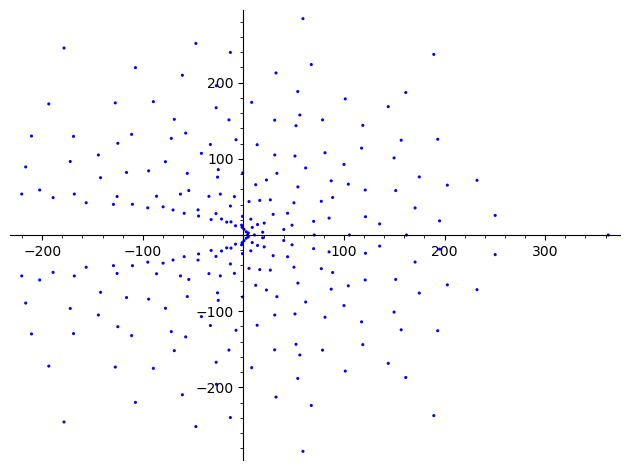

ROOTS AT N =  250
(251, 1)
(252, 1)
(253, 1)
(254, 1)
(255, 1)
(256, 1)
(257, 1)
(258, 1)
(259, 1)
(260, 1)
(261, 1)
(262, 1)
(263, 1)
(264, 1)
(265, 1)
(266, 1)
(267, 1)
(268, 1)
(269, 1)
(270, 1)
(271, 1)
(272, 1)
(273, 1)
(274, 1)
(275, 1)
(276, 1)
(277, 1)
(278, 1)
(279, 1)
(280, 1)
(281, 1)
(282, 1)
(283, 1)
(284, 1)
(285, 1)
(286, 1)
(287, 1)
(288, 1)
(289, 1)
(290, 1)
(291, 1)
(292, 1)
(293, 1)
(294, 1)
(295, 1)
(296, 1)
(297, 1)
(298, 1)
(299, 1)
tests:
[]
MINIMUM MODULI


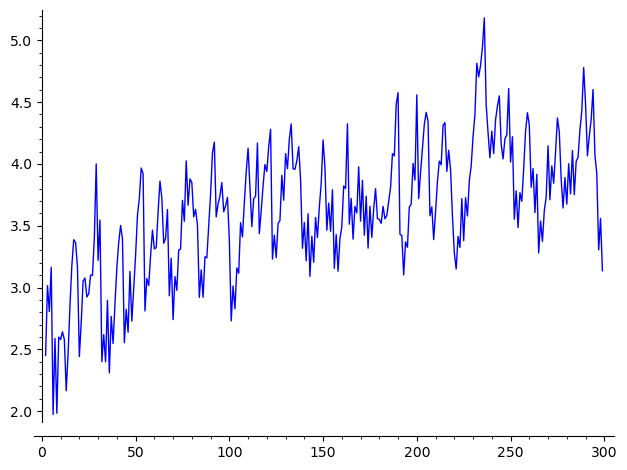

LOGS MINIMUM MODULI


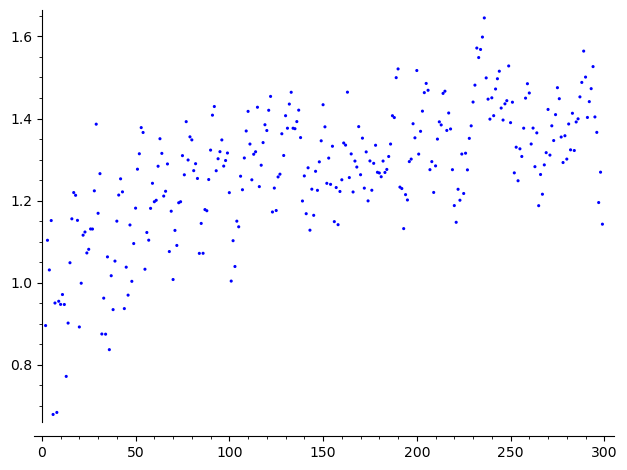

MAXIMUM MODULI


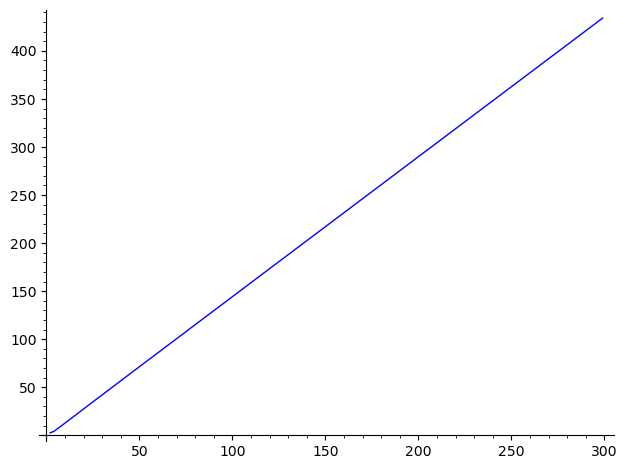

In [2]:
def P_matrix(lst):
    lenlist = len(lst)
    columns = [lst]
    for k in range(1, lenlist):
        column = [0]*(k-1) + [-k] + lst
        column = column[:lenlist]
        columns.append(column)
        #print("DEBUG columns =", columns)   # <---- add this
    return matrix(columns).transpose()

import pickle
with open('/Users/barrybrent/data/run30sept25no1.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)


from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
maxes_list=[]
log_mins_list=[]
log_maxes_list=[]
no=[]
tests=[]
for bound in range(2,300):
    lst = [j[1] for j in j_list[1:bound+1]] # cuts out the dummy offset
    inpt=[j for j in lst]
    pl=P_matrix(inpt)
    test=pl.det()/(nth_prime(bound)*factorial(bound))
    if test!=1:
        no.append(bound)
    #show(pl)
    print((bound,test))
    matrix_list+=[(bound,pl)]
    cp=pl.charpoly()
    charpol_list+=[(bound,cp)]
    roots = cp.roots(ring=CIF, multiplicities=False)        # produces list of roots as Sage objects
    roots_list+=[(bound,roots)]
    centers=[r.center() for r in roots]
    pairs = [(z.real(), z.imag()) for z in centers]

# Plot the points (no lines, small points, only axis ticks)
    if bound%50==0:
        p = list_plot(pairs, plotjoined=False, pointsize=5, axes_labels=['', ''])
        p.show()
        print("ROOTS AT N = ",bound)
    centers_list+=[(bound,centers)]
    max_diameter=max([r.diameter() for r in roots])
    max_diameter_list+=[(bound,max_diameter)]
    aar = [r.abs() for r in roots]
    aar_list+=[(bound,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)
        mins_list.append((bound,minn))
        log_minn=log(minn)
        log_mins_list.append((bound,log_minn))
        maxx=max(aar)
        maxes_list.append((bound,maxx))
    
print("tests:")
print(tests)
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=False, pointsize=5, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
print("MAXIMUM MODULI")
p.show()
with open('/Users/barrybrent/data/run30sept25no5.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) # ouput snipped
with open('/Users/barrybrent/data/run30sept25no6.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile) # ouput snipped
with open('/Users/barrybrent/data/run30sept25no7.txt', 'wb') as wfile:
    pickle.dump(maxes_list, wfile) # ouput snipped
with open('/Users/barrybrent/data/run30sept25no8.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) # ouput snipped
with open('/Users/barrybrent/data/run30sept25no9.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) # ouput snipped

In [92]:
print(maxes_list[:5])

[(2, 2.44948974278317809819728407471?), (3, 3.3002709768391289926387220107?), (4, 3.9995327919357884627900405770?), (5, 5.3944503585378489520729720356?), (6, 6.7869579846395559588816698245?)]


In [93]:
for pair in maxes_list:
    ratio=RR(pair[1])/pair[0]
    print((pair[0],ratio))

(2, 1.22474487139159)
(3, 1.10009032561304)
(4, 0.999883197983947)
(5, 1.07889007170757)
(6, 1.13115966410659)
(7, 1.17529644581636)
(8, 1.21008387436491)
(9, 1.23837148749563)
(10, 1.26167639169393)
(11, 1.28109777316474)
(12, 1.29744753219640)
(13, 1.31134048188223)
(14, 1.32324858258490)
(15, 1.33353797640218)
(16, 1.34249535795298)
(17, 1.35034720913627)
(18, 1.35727400496678)
(19, 1.36342078921168)
(20, 1.36890510014272)
(21, 1.37382295006833)
(22, 1.37825336835949)
(23, 1.38226187864790)
(24, 1.38590318057116)
(25, 1.38922323398550)
(26, 1.39226089118994)
(27, 1.39504918477619)
(28, 1.39761635116477)
(29, 1.39998664978535)
(30, 1.40218102311542)
(31, 1.40421763191329)
(32, 1.40611229190487)
(33, 1.40787883214628)
(34, 1.40952939074162)
(35, 1.41107466015310)
(36, 1.41252409171623)
(37, 1.41388606695672)
(38, 1.41516804174946)
(39, 1.41637666814851)
(40, 1.41751789777095)
(41, 1.41859706987178)
(42, 1.41961898665856)
(43, 1.42058797792496)
(44, 1.42150795670859)
(45, 1.42238246737